# Loudspeakers

[return to main page](index.ipynb)

## Preparations

In [1]:
import numpy as np
from scipy import special  # for bessel functions

# remove "inline" to get a separate plotting window:
%matplotlib inline
import matplotlib.pyplot as plt

## The Electrodynamic Cone Loudspeaker

### Basic Principle

### Piston Radiator Model

The piston radiator model defines the loudspeaker's membran as a two-dimensional plane surface $S_0$ vibrating with a constant particle velocity spectrum $V(\mathbf x0, \omega) = \hat V$. The coordinate $\mathbf x_0$ denotes a point on the surface. The sound field radiated from a planar surface is given 

$$
P(\mathbf{x},\omega) =
- 2 \int_{S_0} G(\mathbf{x}-\mathbf{x}_0, \omega)
\,\frac{\partial P(\mathbf{x}_0, \omega)}{\partial \mathbf n(\mathbf{x}_0)} \mathrm{d}A(\mathbf{x}_0)
$$

with three-dimensional Green's function and the directional derivative of the sound field given as

$$ 
G(\mathbf{x}-\mathbf{x}_0, \omega)
    = \frac{\mathrm{exp}\left(-j\frac{\omega}{c} |\mathbf x - \mathbf x_0| \right)}{4\pi|\mathbf x - \mathbf x_0|} 
\quad \text{and} \quad
\frac{\partial}{\partial \mathbf n} P(\mathbf x_0, \omega)
    = \left( \mathbf n(\mathbf x) \cdot \nabla P(\mathbf x, \omega) \right) \big|_{\,\mathbf x = \mathbf x_0} \,,
$$

respectively. From the Euler Equation and its respective temporal Fourier transform

$$ -\varrho_0 \frac{\partial \mathbf v(\mathbf x, t)}{\partial t} =  \nabla p(\mathbf x, t) 
\qquad \qquad
    j \omega \varrho_0 \mathbf V(\mathbf x, \omega) =  \nabla P(\mathbf x, \mathbf t) 
$$

we get the relation between the sound field gradient and the particle velocity. Inserting all the definition into the first equation yields

$$
P(\mathbf x, \omega) = - j \varrho_0 \omega \; \frac{\hat{V}}{2 \pi} \int_{S_0} 
\frac{e^{- j \frac{\omega}{c} |\mathbf x-\mathbf x_0|}}{|\mathbf x-\mathbf x_0|} \mathrm d A_0(\mathbf x_0)
$$

For the arbitrary surface shapes, this integral can not be solved analytically. 

#### Circular Piston

The circular piston is a simplifies the general piston radiator to a circular surface located in the xy-plane with its center being the coordinates origin and $R$ denoting its radius. We express $\mathbf x_0 = [\rho_0 \cos(\phi_0), \rho_0 \sin(\phi_0), 0]^T$ in term of the polar coordinates $\rho_0$ (distance to z-axis) and $\phi_0$ (azimuth angle). With the differential surface element $\mathrm d A_0(\mathbf x_0) = \rho_0 \, \mathrm d \phi_0\, \mathrm d \rho_0$, the radiated sound field reads

$$
P(\mathbf x, \omega) = - j \varrho_0 \omega \; \frac{\hat{V}}{2 \pi} \int_0^{2\pi} \int_0^R 
\frac{e^{- j \frac{\omega}{c} |\mathbf x-\mathbf x_0|}}{|\mathbf x-\mathbf x_0|} \rho_0 \, \mathrm d \phi_0\, \mathrm d \rho_0 \,.
$$

Although this integral looks quite simple, it is not possible to solve it. We hence look at some special cases, we the calculation are possible.

#### On-Axis Frequency Response of Circular Piston

For the on-axis ( $\mathbf x \Rightarrow [0, 0, z]^T$ with $z>0$ ) frequency response of the circular piston, this integral reads

$$
P(0,0,z, \omega) = -j \varrho_0 \omega \; \frac{\hat{V}}{2 \pi} \int_0^{2\pi} \int_0^R
e^{- j \frac{\omega}{c} \sqrt{\rho_0^2 + z^2}} \frac{\rho_0 }{\sqrt{\rho_0^2 + z^2}} \, \mathrm d \phi_0\, \mathrm d \rho_0
$$

Solving the integral with respect to $\phi_0$ is straight-forward as there is no term which is depending on $\phi_0$. Its result is $2\pi$ and the remaining equation reads

$$
P(0,0,z, \omega) = - j \varrho_0 \omega\; \hat{V} \int_0^R
e^{- j \frac{\omega}{c} \sqrt{\rho_0^2 + z^2}} \frac{\rho_0 }{\sqrt{\rho_0^2 + z^2}} \, \mathrm d \rho_0 \,.
$$

Substituting $u = \sqrt{\rho_0^2 + z^2}$ and $\mathrm d u = \frac{\rho_0}{\sqrt{\rho_0^2 + z^2}} \mathrm d \rho_0$ yields

$$
P(0,0,z, \omega) 
    = - j \varrho_0 \omega \; \hat{V} \int_z^\sqrt{R^2 + z^2} e^{- j \frac{\omega}{c} u} \, \mathrm d u 
    = \varrho_0 c \hat{V}  \left[- e^{j \frac{\omega}{c} u} \right]_z^\sqrt{R^2 + z^2}
    = \varrho_0 c \hat{V} \; e^{- j \frac{\omega}{c} z} \left(e^{- j \frac{\omega}{c} \left(\sqrt{R^2 + z^2} - z\right)} - 1\right)
$$

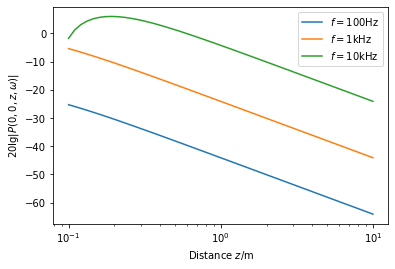

In [2]:
f = np.logspace(2,4, num=3)
c = 343
k = 2*np.pi*f/c
R = 0.0826  # 8,26cm (6.5" chassis)
z = np.logspace(-1,1,num=50)

# transpose matrix to enable broadcasting
z = np.transpose(z[:, np.newaxis], axes=[0,1])

# rho_0*c*V = 1
P = np.exp(-1j*k*np.sqrt(R**2 + z**2)) - np.exp(-1j*k*z)

plt.semilogx(z, 20*np.log10(abs(P)))
plt.xlabel('Distance $z$/m')
plt.ylabel('$20 \lg |P(0,0,z,\omega)|$')
plt.legend(('$f = 100$Hz', '$f = 1$kHz', '$f = 10$kHz'))

#### Far-field Directivity of Circular Piston

Similar to the exercise about microphones, we define the far-field directivity as

$$
P(\phi, \theta, \omega) = \lim_{|\mathbf x|\rightarrow \infty} \frac{P(\mathbf x, \omega)}{P_{ps}(\mathbf x, \omega)}
$$

with the sound field of a point source located at the coordinates' origin given as

$$
P_{ps}(\mathbf x, \omega) = \frac{\mathrm{exp}\left(-j\frac{\omega}{c} |\mathbf x| \right)}{4\pi|\mathbf x|}
$$

Inserting both sound fields yields

$$
P(\phi, \theta, \omega) = -j \varrho_0 \omega \hat V \lim_{|\mathbf x|\rightarrow \infty} \int_0^{2\pi} \int_0^R 
e^{- j \frac{\omega}{c} (|\mathbf x-\mathbf x_0| - |\mathbf x|)} \frac{|\mathbf x|}{|\mathbf x-\mathbf x_0|} \rho_0 \, \mathrm d \phi_0\, \mathrm d \rho_0
$$

We will compute the limit for the distance ratio and the exponential term seperately. This however only possible (allowed), if both term have a finite limit (which they both have). 

##### Limit of Distance Ratio

The distance ratio is quite simple as the distance between $\mathbf x$ and $\mathbf x_0$ is negligible, if |$\mathbf x$| grows to infinity. Hence the limit of the ratio reads

$$
  \lim_{|\mathbf x|\rightarrow \infty} \frac{|\mathbf x|}{|\mathbf x-\mathbf x_0|} = 1 \,.
$$

##### Limit of Exponential Term

For the limit of exponential term, we remember, that the exponential is a continuous function. It means, that you can exchange the limit operator and the expontential term

$$
\lim_{u \rightarrow c} \mathrm{exp}[f(u)] = \mathrm{exp}\left[ \lim_{u \rightarrow c} f(u)\right]
$$

Again, this mathematically correct, only if $f(u)$ has a finite limit (which it luckily has in our case). We can hence restrict ourselfs to calcute the limit of the distance different inside the exponential. Using the law of cosines, it reads

$$
|\mathbf x - \mathbf x_0| - |\mathbf x| 
= \sqrt{r^2 + \rho_0^2 - 2 r \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) )} - r 
$$

We further is expand the term such that we can use the binomial theorem in the numerator

$$
|\mathbf x - \mathbf x_0| - |\mathbf x| 
= \frac{r^2 + \rho_0^2 - 2 r \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) ) - r^2 }{\sqrt{r^2 + \rho_0^2 - 2 r \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) )} + r}
= \frac{\rho_0^2 - 2 r \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) )}{\sqrt{r^2 + \rho_0^2 - 2 r \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) )} + r}
$$

We can finally calculate the limit

$$
\lim_{|\mathbf x|\rightarrow \infty}
|\mathbf x - \mathbf x_0| - |\mathbf x| 
= \lim_{r \rightarrow \infty}
\frac{r \left( \color{red}{\frac{\rho_0^2}{r}} - 2 \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) ) \right)}{r \left(\sqrt{1 + \color{red}{\frac{\rho_0^2}{r^2}} - 2 \color{red}{\frac{\rho_0}{r}} \cos( \sphericalangle(\mathbf x, \mathbf x_0) )} + 1 \right)}
= - \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) )
$$

where the terms marked in the red become zero if $r$ grows to infinity.

##### Final Calculation Steps

Inserting the limits into the integral yields

$$
P(\phi, \theta, \omega) 
    = -j \varrho_0 \omega \frac{\hat{U}}{2 \pi} \int_0^{2\pi} \int_0^R 
e^{+ j \frac{\omega}{c} \rho_0 \cos( \sphericalangle(\mathbf x, \mathbf x_0) )} \rho_0 \, \mathrm d \phi_0\, \mathrm d \rho_0
$$

Using the definition of the scalar product

$$
\mathbf x_0 \cdot \mathbf x = |\mathbf x_0||\mathbf x| \cos( \sphericalangle(\mathbf x, \mathbf x_0) ) 
= \rho_0 r \cos( \sphericalangle(\mathbf x, \mathbf x_0) ) 
$$

with the representations $\mathbf x = [r \cos \phi \sin \theta, r \sin \phi \sin \theta, \cos \theta]$ and $\mathbf x_0 = [\rho_0 \cos \phi_0, \rho_0 \sin \phi_0, 0]^T$ yields

$$
\rho_0 r (\cos \phi_0 \cos \phi + \sin \phi_0 \sin \phi) \sin \theta =
\rho_0 r \cos (\phi_0 - \phi) \sin \theta = 
\rho_0 r \cos( \sphericalangle(\mathbf x, \mathbf x_0) ) \,.
$$

The first equality comes from the addition theorem of cosine and sine functions. The far-field directivity reads

$$
P(\phi, \theta, \omega) 
   = -j \varrho_0 \omega \frac{\hat{V}}{2 \pi} \int_0^{2\pi} \int_0^R 
e^{+ j \frac{\omega}{c} \rho_0 \cos( \phi - \phi_0 ) \sin( \theta )} \rho_0 \, \mathrm d \phi_0\, \mathrm d \rho_0
$$

The integral w.r.t $\phi_0$ reads 

$$
\frac{1}{2 \pi} \int_0^{2\pi} e^{+ j \frac{\omega}{c} \rho_0 \sin( \theta ) \cos( \phi - \phi_0 )} \, \mathrm d \phi_0
    = \frac{1}{2 \pi} \int_0^{2\pi} e^{+ j \frac{\omega}{c} \rho_0 \sin( \theta ) \cos(\phi_0)} \, \mathrm d \phi_0
    = J_0\left(\frac{\omega}{c} \rho_0 \sin( \theta )\right) 
$$

As the cosine is periodic w.r.t its argument with a period of $2\pi$, we can always shift the bounds of the integral b w.r.t $\phi_0$ such that $\phi$ can be dropped. A equivalent integral reads

$$
\frac{1}{2 \pi} \int_0^{2\pi} e^{+ j \frac{\omega}{c} \rho_0 \sin( \theta ) \cos(\phi_0)} \, \mathrm d \phi_0
= J_0\left(\frac{\omega}{c} \rho_0 \sin( \theta )\right) \,.
$$

whre $J_0$ is the bessel function of zero-th order. The resulting far-field directivity reads

$$
P(\phi, \theta, \omega)
    = -j \varrho_0 \omega \hat{V} \int_0^R 
    J_0\left(\frac{\omega}{c} \rho_0 \sin( \theta )\right) \rho_0 \,\mathrm d \rho_0 
$$

Using the substitution $u = \frac{\omega}{c} \rho_0 \sin( \theta )$ and $ \mathrm d u = \frac{\omega}{c} \sin( \theta ) \mathrm d \rho_0 $

$$
P(\phi, \theta, \omega)
    = - j \varrho_0 c \; \frac{\hat{V}}{\frac{\omega}{c} \sin( \theta )^2} \int_0^{\frac{\omega}{c} R \sin(\theta)} 
    J_0\left(u \right) u \,\mathrm d u
$$

The integral identity $\int J_0 (u) u \mathrm d u  = J_1 (u) u $ enables us to 

$$
P(\phi, \theta, \omega)
    = - j \varrho_0 c \; \frac{\hat{V}}{\frac{\omega}{c} \sin( \theta )^2} \Big[
    J_1(u) u \Big]_0^{\frac{\omega}{c} R \sin(\theta)}
    = - j \varrho_0 c \hat{V} R^2 \frac{J_1\Big(\frac{\omega}{c} R \sin(\theta)\Big)}{\frac{\omega}{c} R \sin(\theta)}
$$

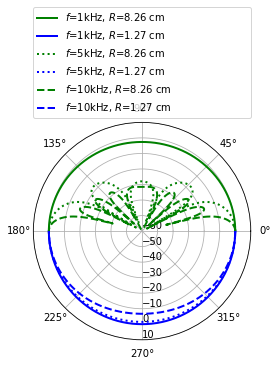

In [3]:
theta = np.linspace(0.001,np.pi, 361)
theta = theta.reshape(1,-1)
theta = np.array([1, -1, 1, -1, 1, -1]).reshape(-1,1) * theta

f = np.array([1000, 5000, 10000]) 
f = np.transpose(f[:, np.newaxis], axes=[0,1])
c = 343
R = np.array([0.0826, 0.0127])  # 8,26cm (6.5" chassis) and 1.27 (1" chassis)
kR = 2*np.pi*f/c*R
kR = kR.reshape(-1,1)

# normalised by P(phi, 0, omega) = -j rho_0 c V^2 R**2 * 0.5
P = 20*np.log10( abs( 2 * special.jn(1, kR*np.sin(theta))/(kR*np.sin(theta)) ))

# plotting
ax = plt.subplot(111, projection='polar')
ax.plot(theta[0,:], P[0,:], 'g-', linewidth=2)
ax.plot(theta[1,:], P[1,:], 'b-', linewidth=2)
ax.plot(theta[2,:], P[2,:], 'g:', linewidth=2)
ax.plot(theta[3,:], P[3,:], 'b:', linewidth=2)
ax.plot(theta[4,:], P[4,:], 'g--', linewidth=2)
ax.plot(theta[5,:], P[5,:], 'b--', linewidth=2)

ax.set_rmax(10)
ax.set_rmin(-60)
ax.set_rlabel_position(270)
ax.yaxis.set_ticks(np.linspace(-60, 10, num=8))
ax.grid(True)
ax.legend(['$f$=1kHz, $R$=8.26 cm', '$f$=1kHz, $R$=1.27 cm', '$f$=5kHz, $R$=8.26 cm',
           '$f$=5kHz, $R$=1.27 cm', '$f$=10kHz, $R$=8.26 cm', '$f$=10kHz, $R$=1.27 cm'], 
   bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.)
plt.show()

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>